In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Given data
years = np.array([2022, 2023, 2024, 2025]).reshape(-1, 1)
demand = np.array([595, 735, 748, 824.5])

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(years, demand)

# Predict for the year 2026
year_2026 = np.array([[2026]])
predicted_demand_2026 = model.predict(year_2026)

print(f"Predicted demand for 2026: {predicted_demand_2026[0]:.2f}")


Predicted demand for 2026: 901.00


In [6]:
predictions = model.predict(years)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(demand, predictions)
mse = mean_squared_error(demand, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(demand, predictions)

# Display performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 22.22
Mean Squared Error (MSE): 705.64
Root Mean Squared Error (RMSE): 26.56
R² Score: 0.90


In [13]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Cross-validation using Leave-One-Out (LOOCV) with MAE
loo = LeaveOneOut()
cv_mae_scores = cross_val_score(model, years, demand, cv=loo, scoring='neg_mean_absolute_error')

# Convert scores to positive
cv_mae_scores = -cv_mae_scores
print("Leave-One-Out Cross-Validation MAE Scores:", cv_mae_scores)
print("Average LOOCV MAE:", np.mean(cv_mae_scores))


Leave-One-Out Cross-Validation MAE Scores: [84.66666667 63.5        18.14285714 21.16666667]
Average LOOCV MAE: 46.86904761904225


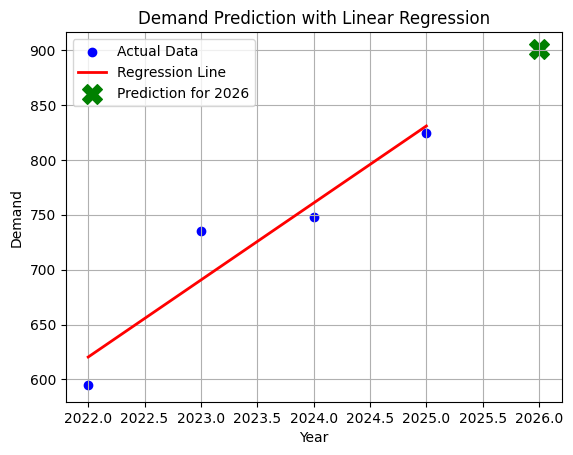

In [16]:
import matplotlib.pyplot as plt
# 🎯 Regression Plot
plt.scatter(years, demand, color='blue', label='Actual Data')
plt.plot(years, predictions, color='red', linewidth=2, label='Regression Line')
plt.scatter(year_2026, predicted_demand_2026, color='green', marker='X', s=200, label='Prediction for 2026')
plt.xlabel('Year')
plt.ylabel('Demand')
plt.legend()
plt.title('Demand Prediction with Linear Regression')
plt.grid(True)
plt.show()

Polynomial Regression Prediction for 2026: 821.63
Polynomial Regression LOOCV MAE Scores: [190.50000022  63.5         63.49999993 190.49999964]
Average Polynomial Regression LOOCV MAE: 126.99999994784594


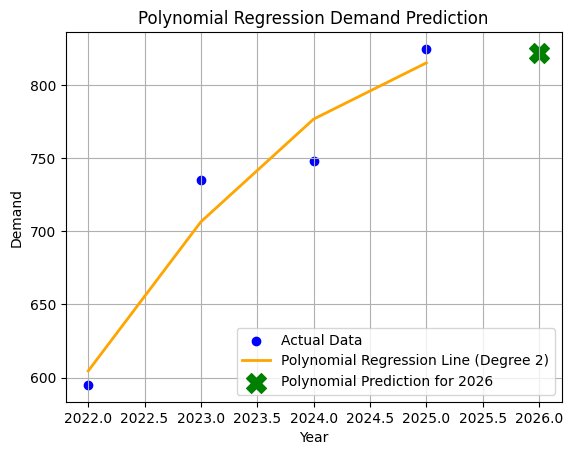

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(years, demand)

# Predict for 2026
poly_pred_2026 = poly_model.predict(year_2026)
print(f"Polynomial Regression Prediction for 2026: {poly_pred_2026[0]:.2f}")

# Cross-validation with LOOCV for polynomial model
cv_poly_mae_scores = cross_val_score(poly_model, years, demand, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
cv_poly_mae_scores = -cv_poly_mae_scores
print("Polynomial Regression LOOCV MAE Scores:", cv_poly_mae_scores)
print("Average Polynomial Regression LOOCV MAE:", np.mean(cv_poly_mae_scores))

# Plot polynomial regression curve
plt.scatter(years, demand, color='blue', label='Actual Data')
plt.plot(years, poly_model.predict(years), color='orange', linewidth=2, label='Polynomial Regression Line (Degree 2)')
plt.scatter(year_2026, poly_pred_2026, color='green', marker='X', s=200, label='Polynomial Prediction for 2026')
plt.xlabel('Year')
plt.ylabel('Demand')
plt.legend()
plt.title('Polynomial Regression Demand Prediction')
plt.grid(True)
plt.show()



Predicted Demand for 2026 (Month-by-Month):
2026.01: 824.50 MW
2026.02: 940.50 MW
2026.03: 1260.00 MW
2026.04: 1733.50 MW
2026.05: 1552.50 MW
2026.06: 1527.00 MW
2026.07: 1373.50 MW
2026.08: 1306.50 MW
2026.09: 1555.00 MW
2026.10: 1356.50 MW
2026.11: 1268.50 MW
2026.12: 950.00 MW


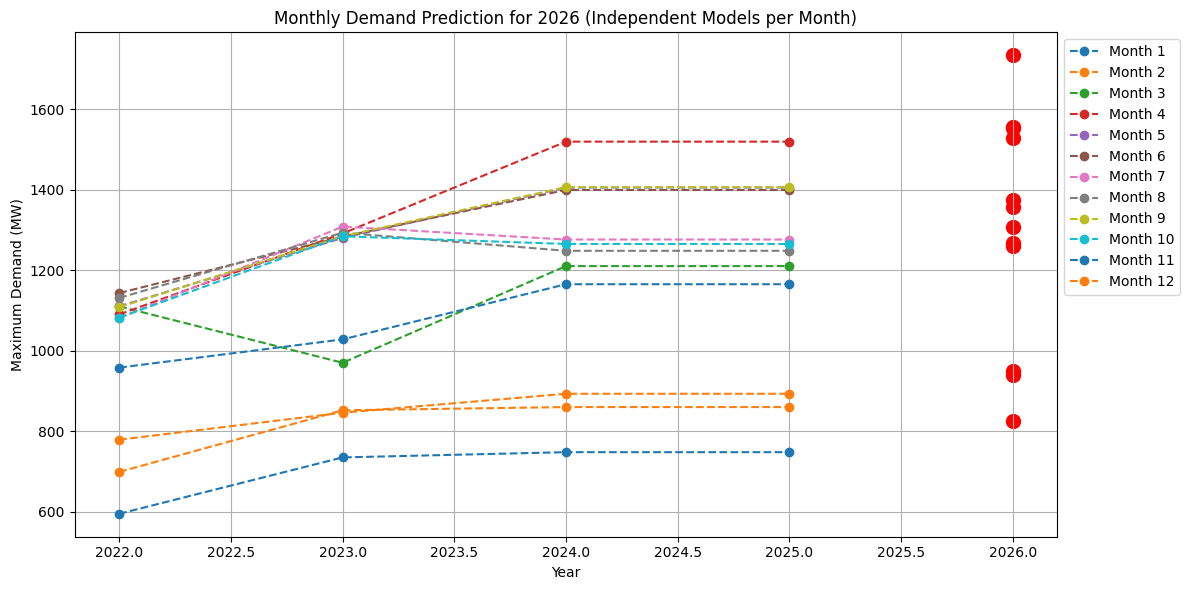

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# === Prepare the data ===
data = {
    'Year': [2022]*12 + [2023]*12 + [2024]*12 + [2025]*12,
    'Month': list(range(1, 13)) * 4,
    'Demand': [
        595, 699, 1110, 1090, 1110, 1143, 1081, 1131, 1108, 1082, 958, 779,
        735, 852, 970, 1291, 1280, 1283, 1308, 1293, 1284, 1284, 1028, 846,
        748, 860, 1210, 1519, 1405, 1399, 1276, 1248, 1406, 1265, 1165, 893,
        748, 860, 1210, 1519, 1405, 1399, 1276, 1248, 1406, 1265, 1165, 893
    ]
}
df = pd.DataFrame(data)

# === Predict each month individually ===
predictions = {}

for month in range(1, 13):
    # Extract data only for the current month across all years
    month_data = df[df['Month'] == month]
    X = month_data['Year'].values.reshape(-1, 1)
    y = month_data['Demand'].values
    
    # Train the model for this specific month
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict demand for this month in 2026
    predictions[month] = model.predict([[2026]])[0]

# Display the predictions
print("\nPredicted Demand for 2026 (Month-by-Month):")
for month, demand in predictions.items():
    print(f"2026.{month:02d}: {demand:.2f} MW")

# === Visualization ===
plt.figure(figsize=(12, 6))

for month in range(1, 13):
    month_data = df[df['Month'] == month]
    X = month_data['Year'].values
    y = month_data['Demand'].values

    plt.plot(X, y, marker='o', label=f"Month {month}", linestyle='--')
    plt.scatter(2026, predictions[month], color='red', s=100)

plt.xlabel('Year')
plt.ylabel('Maximum Demand (MW)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Monthly Demand Prediction for 2026 (Independent Models per Month)')
plt.grid(True)
plt.tight_layout()
plt.show()
